In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

https://matplotlib.org/3.1.0/gallery/color/named_colors.html

# Connections

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/linkedin/Connections.csv",sep=',')
df.tail()

,First Name,Last Name,Email Address,Company,Position,Connected On
7240,Rogério,Pucciarelli,NaN,Banco do Brasil,Assessor,15 Nov 2017
7241,Raquel,Rodrigues,NaN,Urbamais Properties e Participações,Analista de Documentação Pleno,15 Nov 2017
7242,André,Aquino Brito,NaN,FCA Fiat Chrysler Automobiles,Coordenador de comunicação do Departamento de TI,15 Nov 2017
7243,Bruno,Sbampato,NaN,U4Hero,Agile Couch,15 Nov 2017
7244,Flávia Caroline,Berger Silva,NaN,Tetra Pak,Assistente de Projetos e Manutenção (Foco em C...,15 Nov 2017


In [ ]:
df.shape

(7245, 6)

In [ ]:
pd.DataFrame({'type':df.dtypes,
              'null':df.isna().sum()/df.shape[0]*100})

,type,null
First Name,object,0.276052
Last Name,object,0.276052
Email Address,object,96.659765
Company,object,1.352657
Position,object,1.338854
Connected On,object,0.000000


In [ ]:
df['Connected On']

0       04 Oct 2020
1       04 Oct 2020
2       03 Oct 2020
3       03 Oct 2020
4       02 Oct 2020
           ...     
7240    15 Nov 2017
7241    15 Nov 2017
7242    15 Nov 2017
7243    15 Nov 2017
7244    15 Nov 2017
Name: Connected On, Length: 7245, dtype: object

In [ ]:
df['data'] = pd.to_datetime(df['Connected On'])

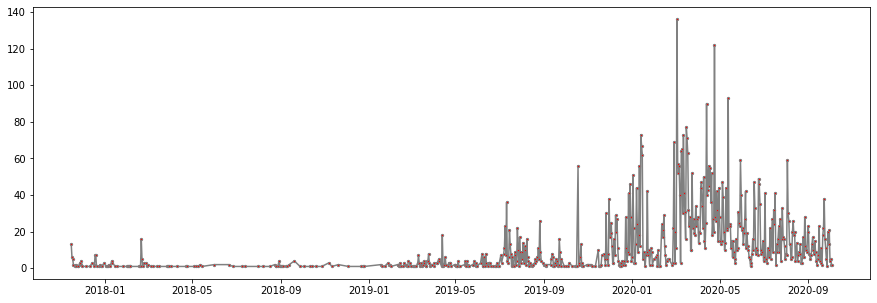

In [ ]:
conexoes = df.groupby('data')['data'].count()

plt.figure(figsize=(15,5))
plt.plot(conexoes, color='grey', marker='o', markersize=2.3, markerfacecolor='red');

In [ ]:
df['data'].min(), df['data'].max()

(Timestamp('2017-11-15 00:00:00'), Timestamp('2020-10-04 00:00:00'))

In [ ]:
df['data'].max() - df['data'].min()

Timedelta('1054 days 00:00:00')

In [ ]:
conexoes.describe()

count    609.000000
mean      11.896552
std       16.696226
min        1.000000
25%        2.000000
50%        5.000000
75%       16.000000
max      136.000000
Name: data, dtype: float64

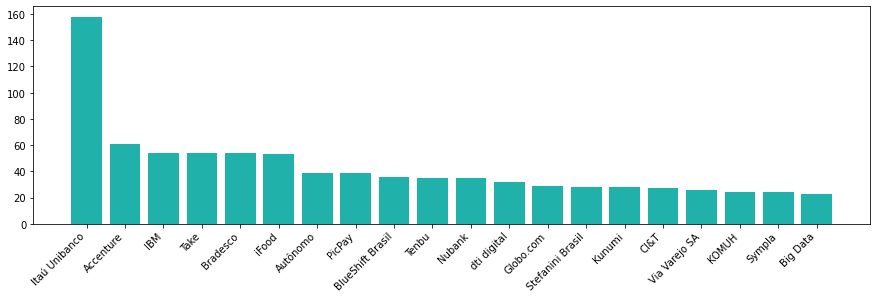

In [ ]:
empresas = df.Company.value_counts()

plt.figure(figsize=(15,4))
plt.bar(empresas.index[:20], empresas[:20], color='lightseagreen')
plt.xticks(rotation=45, ha='right');

In [ ]:
df.Position = df.Position.str.lower()

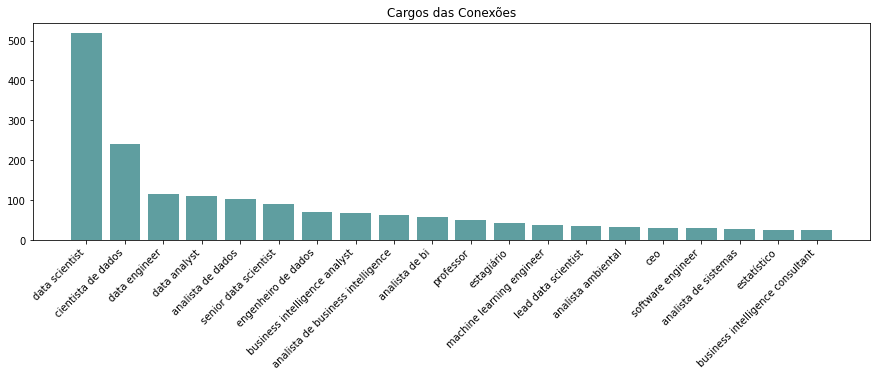

In [ ]:
cargos = df.Position.value_counts()

plt.figure(figsize=(15,4))
plt.bar(cargos.index[:20], cargos[:20], color='cadetblue')
plt.xticks(rotation=45, ha='right')
plt.title("Cargos das Conexões");

In [ ]:
df_semna = df.dropna(axis=0, subset=['Position'])

In [ ]:
ambiental = df_semna[df_semna.Position.str.match(".*(A|a)mbiental.*|.*(a|A)mbiente")]
ambiental.shape[0]

204

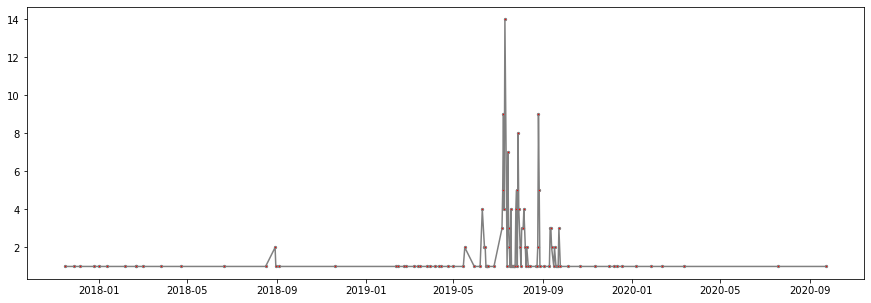

In [ ]:
conexoes_amb = ambiental.groupby('data')['data'].count()

plt.figure(figsize=(15,5))
plt.plot(conexoes_amb, color='grey', marker='o', markersize=2.3, markerfacecolor='red');

In [ ]:
dados = df_semna[df_semna.Position.str.match(".*(D|d)ados.*|.*(D|d)ata.*|.*(M|m)achine (L|l)earning.*|.*Estati?í?stic.*|.*BI.*|.*(B|b)usiness (I|i)ntelligence.*")]
dados.shape[0]

3159

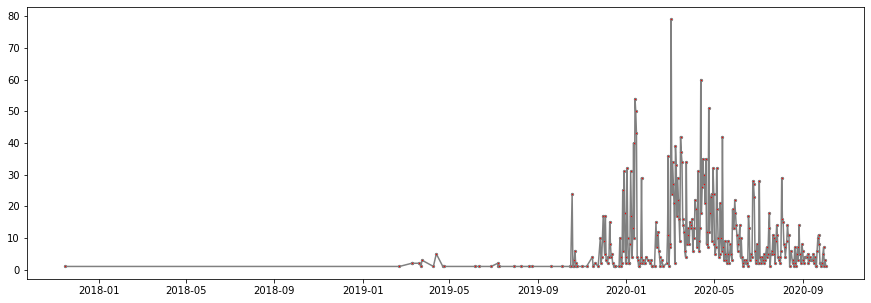

In [ ]:
conexoes_dados = dados.groupby('data')['data'].count()

plt.figure(figsize=(15,5))
plt.plot(conexoes_dados, color='grey', marker='o', markersize=2.3, markerfacecolor='red');

In [ ]:
professor = df_semna[df_semna.Position.str.match(".*(P|p)rofessor.*|.*(T|t)utor.*")]
professor.shape[0]

158

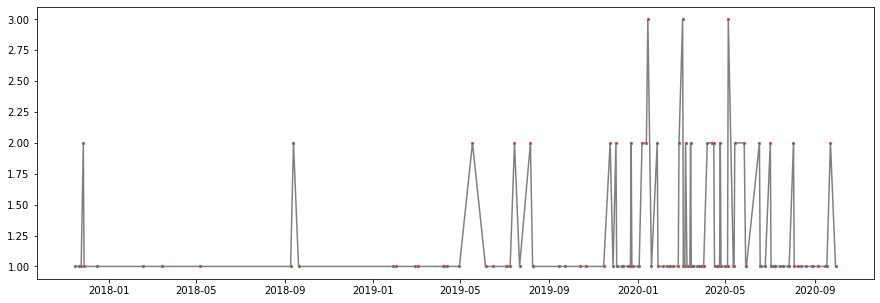

In [ ]:
conexoes_prof = professor.groupby('data')['data'].count()

plt.figure(figsize=(15,5))
plt.plot(conexoes_prof, color='grey', marker='o', markersize=2.3, markerfacecolor='red');

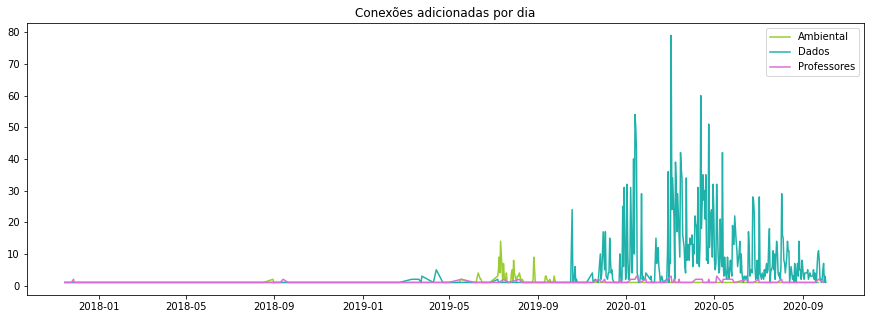

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Conexões adicionadas por dia")
plt.plot(conexoes_amb, color='yellowgreen')
plt.plot(conexoes_dados, color='lightseagreen')
plt.plot(conexoes_prof, color='orchid')
plt.legend(["Ambiental","Dados","Professores"]);

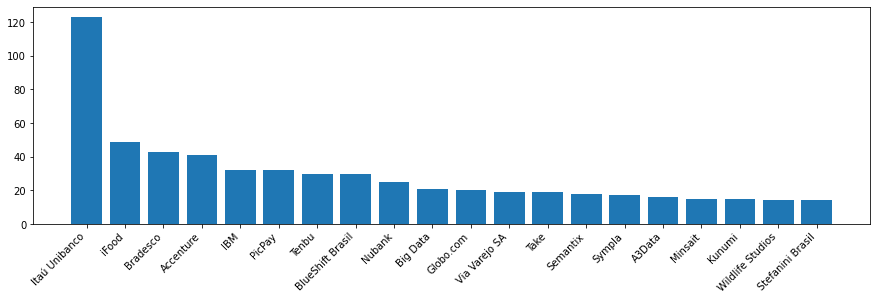

In [ ]:
empresas = dados.Company.value_counts()

plt.figure(figsize=(15,4))
plt.bar(empresas.index[:20], empresas[:20])
plt.xticks(rotation=45, ha='right');

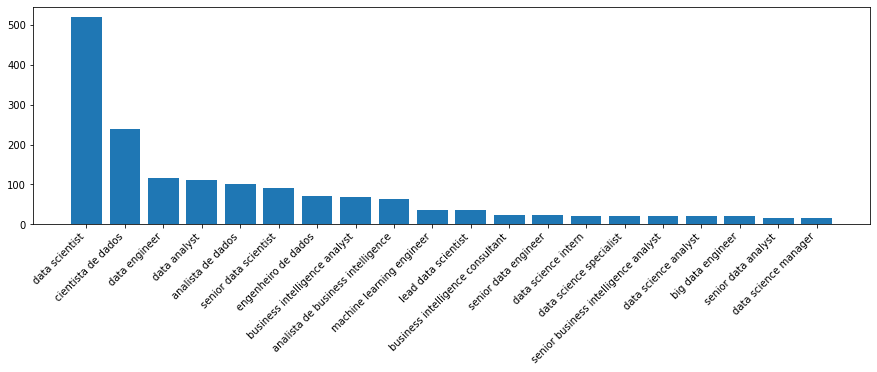

In [ ]:
cargos = dados.Position.value_counts()

plt.figure(figsize=(15,4))
plt.bar(cargos.index[:20], cargos[:20])
plt.xticks(rotation=45, ha='right');

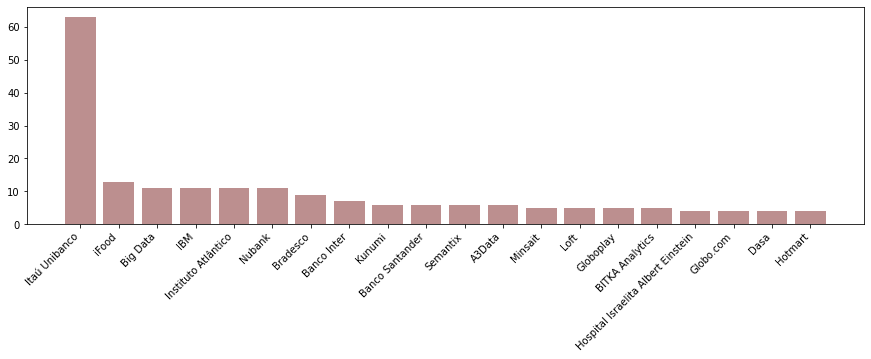

In [ ]:
data_science = df[(df.Position == "data scientist") | (df.Position == "cientista de dados")]

empresas = data_science.Company.value_counts()

plt.figure(figsize=(15,4))
plt.bar(empresas.index[:20], empresas[:20], color='rosybrown')
plt.xticks(rotation=45, ha='right');

# Messages

In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/linkedin/messages.csv",sep=',')
df.tail()

,CONVERSATION ID,CONVERSATION TITLE,FROM,TO,DATE,SUBJECT,CONTENT,FOLDER
5841,2-ODZlYWNiYTUtY2Q0OS00MGYxLTg5OTQtZWViY2VlMWVi...,NaN,Wellington Rodrigues,Naiara Cerqueira,2020-04-07 01:08:22 UTC,NaN,"Como falei na msg, trabalho com a expansão de ...",ARCHIVE
5842,2-ODZlYWNiYTUtY2Q0OS00MGYxLTg5OTQtZWViY2VlMWVi...,NaN,Wellington Rodrigues,Naiara Cerqueira,2020-04-07 01:06:56 UTC,NaN,"Oi Naiara, tudo bem?",ARCHIVE
5843,2-ODZlYWNiYTUtY2Q0OS00MGYxLTg5OTQtZWViY2VlMWVi...,NaN,Naiara Cerqueira,Wellington Rodrigues,2020-04-07 01:06:36 UTC,NaN,"oi wellington, me explique melhor :)",ARCHIVE
5844,2-ODZlYWNiYTUtY2Q0OS00MGYxLTg5OTQtZWViY2VlMWVi...,NaN,Wellington Rodrigues,Naiara Cerqueira,2020-04-07 01:06:23 UTC,NaN,"Olá Naiara, boa noite! Tudo bem? Estou trabalh...",ARCHIVE
5845,2-Mzg5MTcwMzAtZDdkNC01MDU2LThlNGItOTQ2OTcxMGFl...,NaN,LinkedIn Premium,Naiara Cerqueira,2017-11-17 18:30:18 UTC,NaN,"Ol&aacute;, Naiara,&nbsp;Milh&otilde;es de usu...",ARCHIVE


In [ ]:
pd.DataFrame({'type':df.dtypes,
              'null':df.isna().sum()/df.shape[0]*100})

,type,null
CONVERSATION ID,object,0.000000
CONVERSATION TITLE,object,99.674991
FROM,object,0.017106
TO,object,0.051317
DATE,object,0.000000
SUBJECT,object,99.298666
CONTENT,object,0.872391
FOLDER,object,0.000000


In [ ]:
df.shape

(5846, 8)

In [ ]:
df.DATE = pd.to_datetime(df.DATE)

In [ ]:
df['CONVERSATION ID'].nunique()

420

In [ ]:
df['FROM'].nunique()

408

In [ ]:
df.groupby('DATE')['CONVERSATION ID'].count()

DATE
2017-11-17 18:30:18+00:00    1
2017-11-27 11:58:21+00:00    1
2017-11-27 12:10:38+00:00    1
2017-11-27 12:10:47+00:00    1
2017-11-27 12:10:52+00:00    1
                            ..
2020-10-06 11:34:50+00:00    1
2020-10-06 11:44:55+00:00    1
2020-10-06 13:43:40+00:00    1
2020-10-06 13:45:17+00:00    1
2020-10-06 13:51:11+00:00    1
Name: CONVERSATION ID, Length: 5822, dtype: int64

In [ ]:
df.groupby('DATE').count()

,CONVERSATION ID,CONVERSATION TITLE,FROM,TO,SUBJECT,CONTENT,FOLDER
DATE,,,,,,,
2017-11-17 18:30:18+00:00,1,0,1,1,0,1,1
2017-11-27 11:58:21+00:00,1,0,1,1,0,1,1
2017-11-27 12:10:38+00:00,1,0,1,1,0,1,1
2017-11-27 12:10:47+00:00,1,0,1,1,0,1,1
2017-11-27 12:10:52+00:00,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...
2020-10-06 11:34:50+00:00,1,0,1,1,0,1,1
2020-10-06 11:44:55+00:00,1,0,1,1,0,1,1
2020-10-06 13:43:40+00:00,1,0,1,1,0,1,1


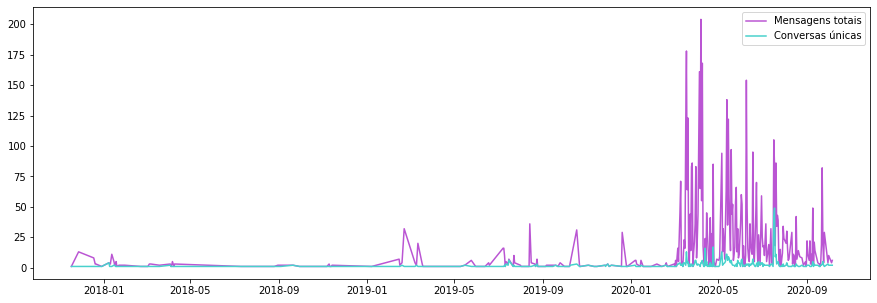

In [ ]:
df['just_date'] = df['DATE'].dt.date

conversas_data = df.groupby('just_date')['CONVERSATION ID'].count()
conversas_unicas = df.groupby('just_date')['CONVERSATION ID'].nunique()

plt.figure(figsize=(15,5))
plt.plot(conversas_data.index, conversas_data.values, color='mediumorchid')
plt.plot(conversas_unicas.index, conversas_unicas.values, color='mediumturquoise')
plt.legend(['Mensagens totais','Conversas únicas']);

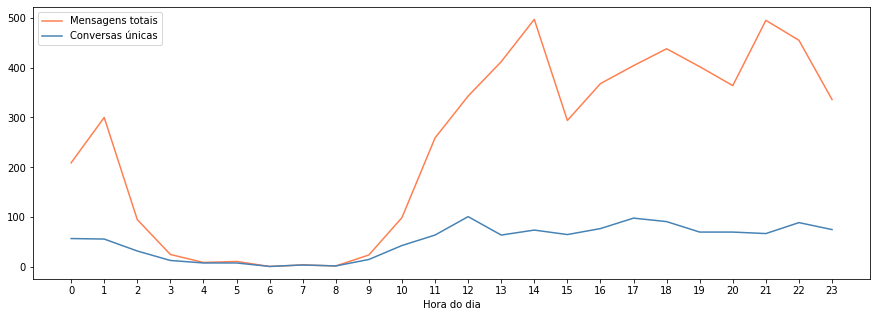

In [ ]:
df['just_hour'] = pd.DatetimeIndex(df['DATE']).hour

hora = df.groupby('just_hour')['CONVERSATION ID'].count()
hora_unica = df.groupby('just_hour')['CONVERSATION ID'].nunique()

plt.figure(figsize=(15,5))
plt.plot(hora.index, hora.values, color='coral')
plt.plot(hora_unica.index, hora_unica.values, color='steelblue')
plt.legend(['Mensagens totais','Conversas únicas'])
plt.xticks(range(0,24))
plt.xlabel("Hora do dia");

## PLN

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 2.6MB/s 


In [ ]:
from nltk.corpus import stopwords
import string
import re
from unidecode import unidecode
from collections import Counter
import operator

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [ ]:
eu = df[df.FROM == 'Naiara Cerqueira']

pln = df.drop(index=eu.index)
pln.head(2)

,CONVERSATION ID,CONVERSATION TITLE,FROM,TO,DATE,SUBJECT,CONTENT,FOLDER,just_date,just_hour,texto
0,2-NmU3NzIwZTEtNTM0ZS00MzY2LTk3MDItYmQ5NWQyMmQ3...,NaN,Galo Carlos Lopez Noriega,Naiara Cerqueira,2020-10-06 13:51:11+00:00,NaN,"Valeu, Naiara",INBOX,2020-10-06,13,"[valeu, naiara]"
2,2-NmU3NzIwZTEtNTM0ZS00MzY2LTk3MDItYmQ5NWQyMmQ3...,NaN,Galo Carlos Lopez Noriega,Naiara Cerqueira,2020-10-06 13:43:40+00:00,NaN,"Olá, tudo bem ? Muito obrigado pelo contato. ...",INBOX,2020-10-06,13,"[ola, tudo, bem, obrigado, contato, lamentavel..."


In [ ]:
pln.CONTENT

0                                           Valeu, Naiara
2       Olá, tudo bem ?  Muito obrigado pelo contato. ...
4                                         Como você está?
5                                               Obrigado!
7       Oii dei uma olhada no seu perfil, achei muito ...
                              ...                        
5839    Para fornecermos maiores informações aos inter...
5841    Como falei na msg, trabalho com a expansão de ...
5842                                 Oi Naiara, tudo bem?
5844    Olá Naiara, boa noite! Tudo bem? Estou trabalh...
5845    Ol&aacute;, Naiara,&nbsp;Milh&otilde;es de usu...
Name: CONTENT, Length: 3157, dtype: object

In [ ]:
conteudo = pln.CONTENT.dropna()

In [ ]:
def pre_processamento_texto(corpus):
    tokenizado = re.findall(r"\w+(?:'\w+)?|[^\w\s]", corpus)
    minusculo = [palavra.lower() for palavra in tokenizado]
    sem_stops = [palavra for palavra in minusculo if palavra not in stopwords.words('portuguese')]
    sem_numeros = [re.sub(r"\d+",'',palavra) for palavra in sem_stops]
    sem_pontuacao = [palavra for palavra in sem_numeros if palavra not in string.punctuation]
    sem_acento = [unidecode(palavra) for palavra in sem_pontuacao]

    return sem_acento

In [ ]:
pre_processamento_texto("asduashd das, ááááááççaçça''ada  asa!!  dasasac 4141 131ijci3")

['asduashd', 'aaaaaaccacca', 'ada', 'asa', 'dasasac', 'ijci']

In [ ]:
df['texto'] = conteudo.progress_apply(lambda x: pre_processamento_texto(x))

In [ ]:
mensagens = df['texto'].dropna()
mensagens

0                                         [valeu, naiara]
2       [ola, tudo, bem, obrigado, contato, lamentavel...
4                                                      []
5                                              [obrigado]
7       [oii, dei, olhada, perfil, achei, interessante...
                              ...                        
5839    [fornecermos, maiores, informacoes, interessad...
5841    [falei, msg, trabalho, expansao, negocios, onl...
5842                              [oi, naiara, tudo, bem]
5844    [ola, naiara, boa, noite, tudo, bem, trabalhan...
5845    [ol, aacute, naiara, nbsp, milh, otilde, es, u...
Name: texto, Length: 3125, dtype: object

In [ ]:
lista = list(mensagens)
palavras = []

for palavra in mensagens:
    palavras.extend(palavra)

palavras = Counter(palavras)
palavras = sorted(palavras.items(), key=operator.itemgetter(1), reverse=True)
palavras[:50]

[('naiara', 308),
 ('pra', 303),
 ('bem', 292),
 ('', 237),
 ('dados', 234),
 ('vc', 206),
 ('tudo', 184),
 ('fazer', 176),
 ('to', 156),
 ('sim', 138),
 ('bom', 137),
 ('area', 133),
 ('vou', 131),
 ('ai', 121),
 ('la', 121),
 ('aqui', 119),
 ('curso', 114),
 ('sobre', 112),
 ('ola', 111),
 ('boa', 109),
 ('parabens', 108),
 ('https', 107),
 ('vai', 103),
 ('acho', 102),
 ('ser', 95),
 ('vi', 93),
 ('ter', 92),
 ('ta', 91),
 ('ainda', 88),
 ('data', 86),
 ('pode', 83),
 ('novo', 83),
 ('obrigado', 79),
 ('oi', 78),
 ('dia', 77),
 ('agora', 75),
 ('q', 74),
 ('entao', 74),
 ('legal', 74),
 ('obrigada', 72),
 ('linkedin', 70),
 ('ver', 66),
 ('trabalho', 63),
 ('rede', 62),
 ('cargo', 62),
 ('gente', 60),
 ('sei', 60),
 ('ne', 60),
 ('pq', 58),
 ('coisa', 58)]

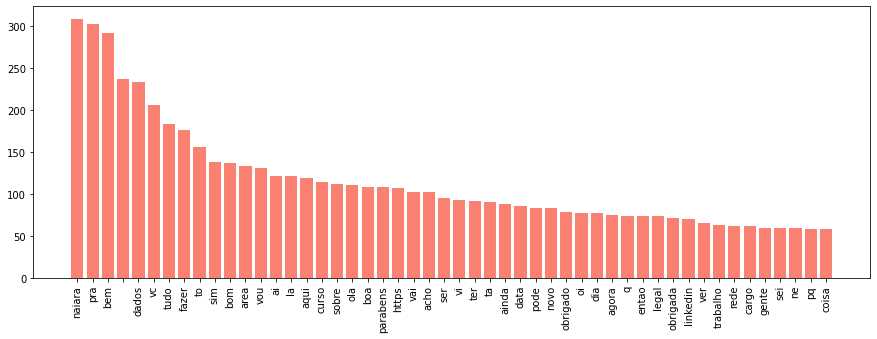

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(dict(palavras[:50]).keys(), dict(palavras[:50]).values(), color='salmon')
plt.xticks(rotation=90);